# EXERCISE 4
Create a bar chart and a pie chart using Matplotlib that represents the population of Portugal according to the CSV file.

- Answer search for -> Final Answer: Bar chart 2024 and by year

In the pie chart, highlight the districts that have a population greater than 500,000 people. Import the file using the Pandas library.

- Answer search for -> Final Answer: Pie chart highlighting population above 500,000 and by year

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
!pwd
df = pd.read_csv("data/populacao_por_distrito_long.csv")

/Users/rosasampaio/Documents/curso pt/Python Visualization/projeto/github/simple_data_visualization_python


In [4]:
df.head(1)

,Distrito,Ano,Populacao
0,Lisboa,2024,2390715


<Axes: >

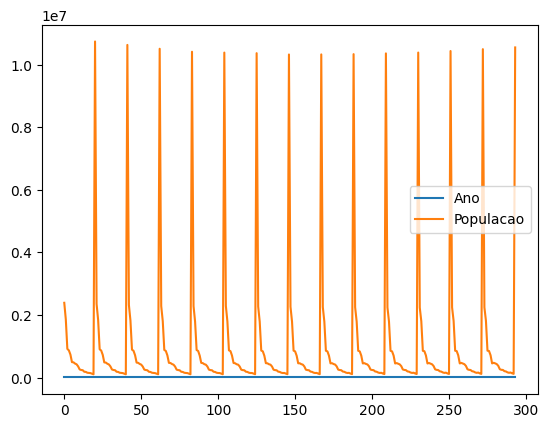

In [5]:
df.plot()

# Understanding the problem in data load

<function matplotlib.pyplot.show(close=None, block=None)>

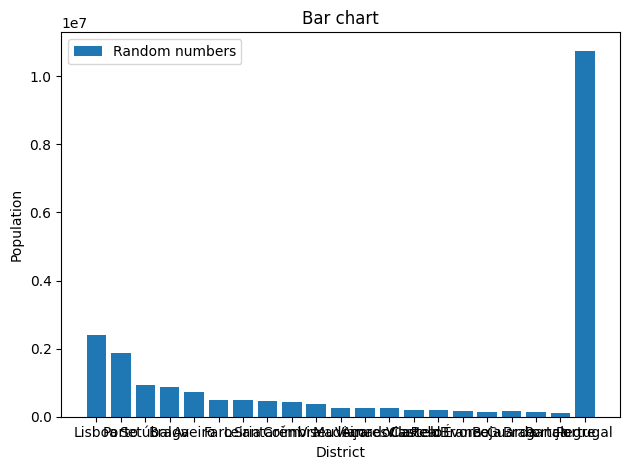

In [6]:
plt.bar(df['Distrito'], df['Populacao'])
plt.xlabel('District') 
plt.ylabel('Population') 
plt.title('Bar chart') 
plt.legend(['Random numbers']) 
plt.tight_layout() 
plt.show

In [7]:
df_copy = df.copy()
df_copy.sort_values(by='Populacao', ascending=False)

,Distrito,Ano,Populacao
20,Portugal,2024,10749635
41,Portugal,2023,10639726
293,Portugal,2011,10558950
62,Portugal,2022,10516621
272,Portugal,2012,10503889
...,...,...,...
103,Portalegre,2020,105676
82,Portalegre,2021,105031
61,Portalegre,2022,104304
40,Portalegre,2023,104081


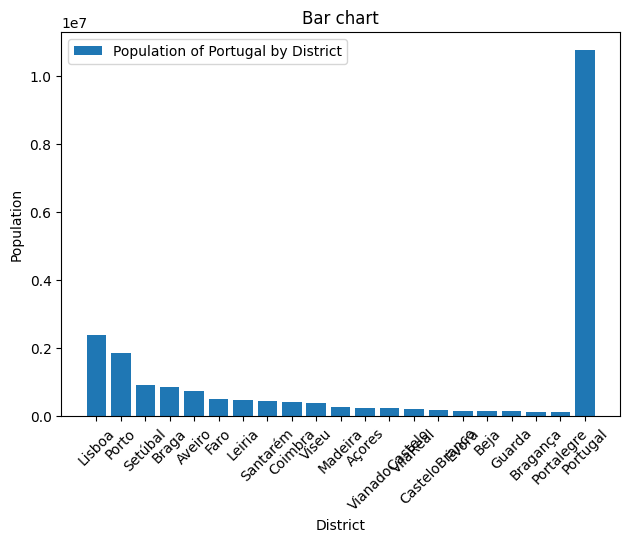

In [8]:
plt.bar(df_copy['Distrito'], df_copy['Populacao'])

plt.xlabel('District') 
plt.ylabel('Population') 

plt.title('Bar chart') 
plt.legend(['Population of Portugal by District']) 

plt.tight_layout() 
plt.xticks(rotation=45)

plt.show()

In [9]:
df_copy = df_copy[df_copy['Distrito'] != 'Portugal']
## df_copy = df_copy[~df_copy['Distrito'].str.strip().str.lower().eq('portugal')]

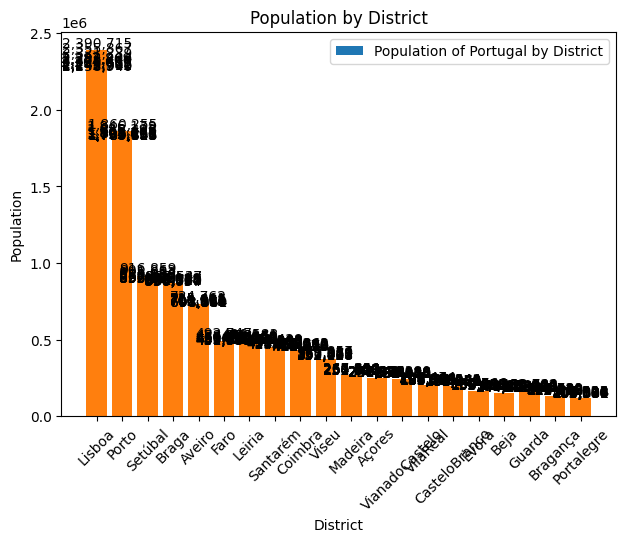

In [10]:
plt.bar(df_copy['Distrito'], df_copy['Populacao'])
bars = plt.bar(df_copy['Distrito'], df_copy['Populacao'])


plt.xlabel('District') 
plt.ylabel('Population') 

plt.title('Population by District') 
plt.legend(['Population of Portugal by District']) 

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{int(height):,}',   # formatação com separador de milhar
        ha='center',
        va='bottom'
    )


plt.tight_layout() 
plt.xticks(rotation=45)

plt.show()

In [11]:
df_copy.info()

<class 'pandas.DataFrame'>
Index: 280 entries, 0 to 292
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Distrito   280 non-null    str  
 1   Ano        280 non-null    int64
 2   Populacao  280 non-null    int64
dtypes: int64(2), str(1)
memory usage: 8.8 KB


In [12]:
print(df_copy['Distrito'].str.len().max())
print(len(df_copy))
print(df_copy['Ano'].max())

14
280
2024


# FINAL GRAPHIC


## Final Answer: Bar chart for 2024 and by year

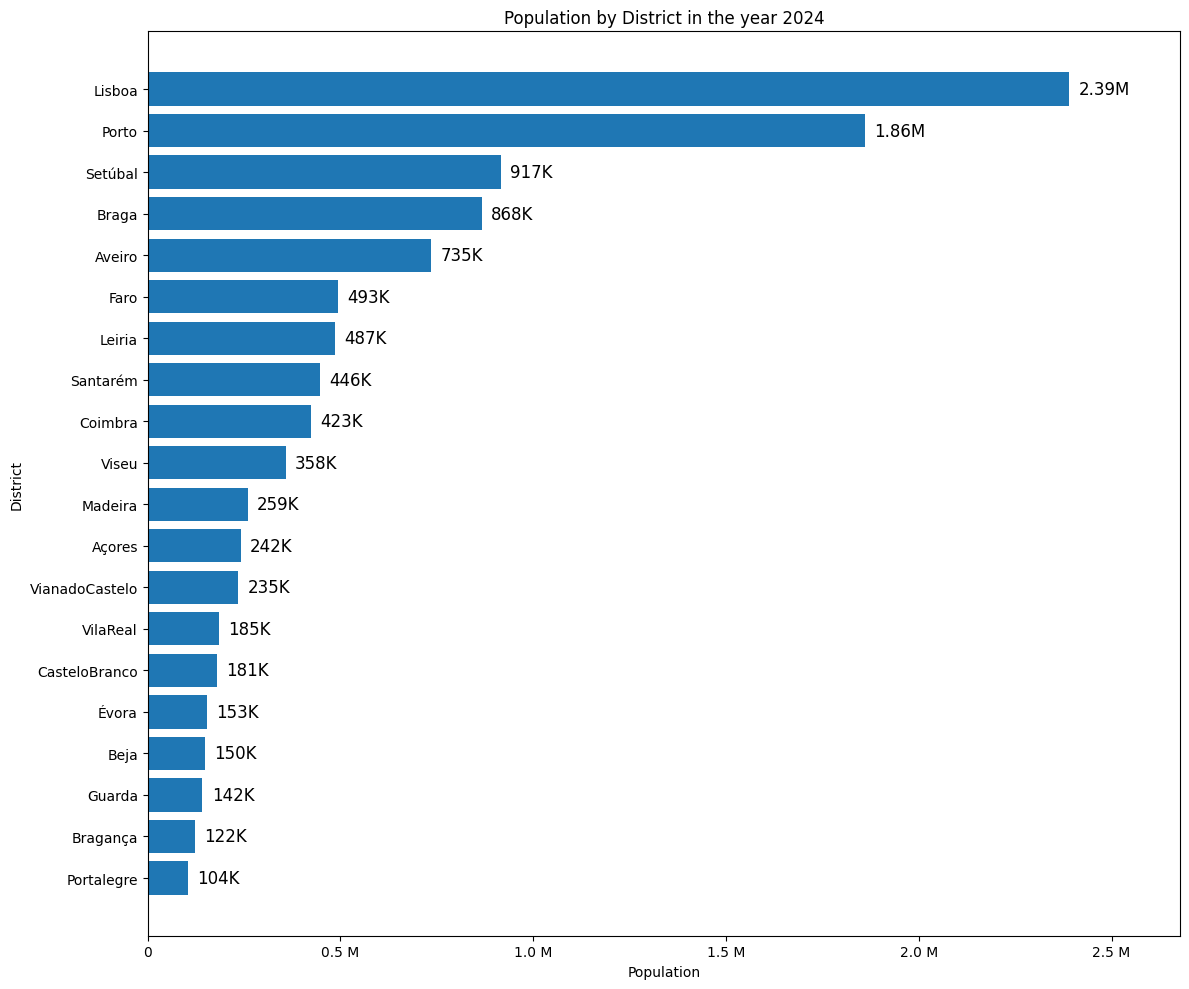

In [13]:
import matplotlib.ticker as mtick 

df_2024 = df_copy[df_copy['Ano'] == 2024]

df_2024.sort_values('Populacao', ascending=False)

def millions_formatter(x, pos):
    if x == 0:
        return '0'
    return f'{x/1_000_000:.1f} M'

plt.figure(figsize=(12, 10))
ax = plt.gca()
bars = plt.barh(df_2024['Distrito'], df_2024['Populacao'])
ax.xaxis.set_major_formatter(mtick.FuncFormatter(millions_formatter)) 

maxv = df_2024['Populacao'].max()
offset = maxv * 0.01
ax.set_xlim(0, maxv * 1.12)

plt.title('Population by District in the year 2024')
plt.xlabel('Population')
plt.ylabel('District')
plt.gca().invert_yaxis()  

for bar in bars:
    v = bar.get_width()

    if v >= 1_000_000:
        label = f'{v/1_000_000:.2f}M'
    else:
        label = f'{v/1_000:.0f}K'

    plt.text(
        v + offset,
        bar.get_y() + bar.get_height()/2,
        label,
        va='center',
        fontsize=12
    )

plt.tight_layout()
plt.show()

# TOP 10 subplots by year

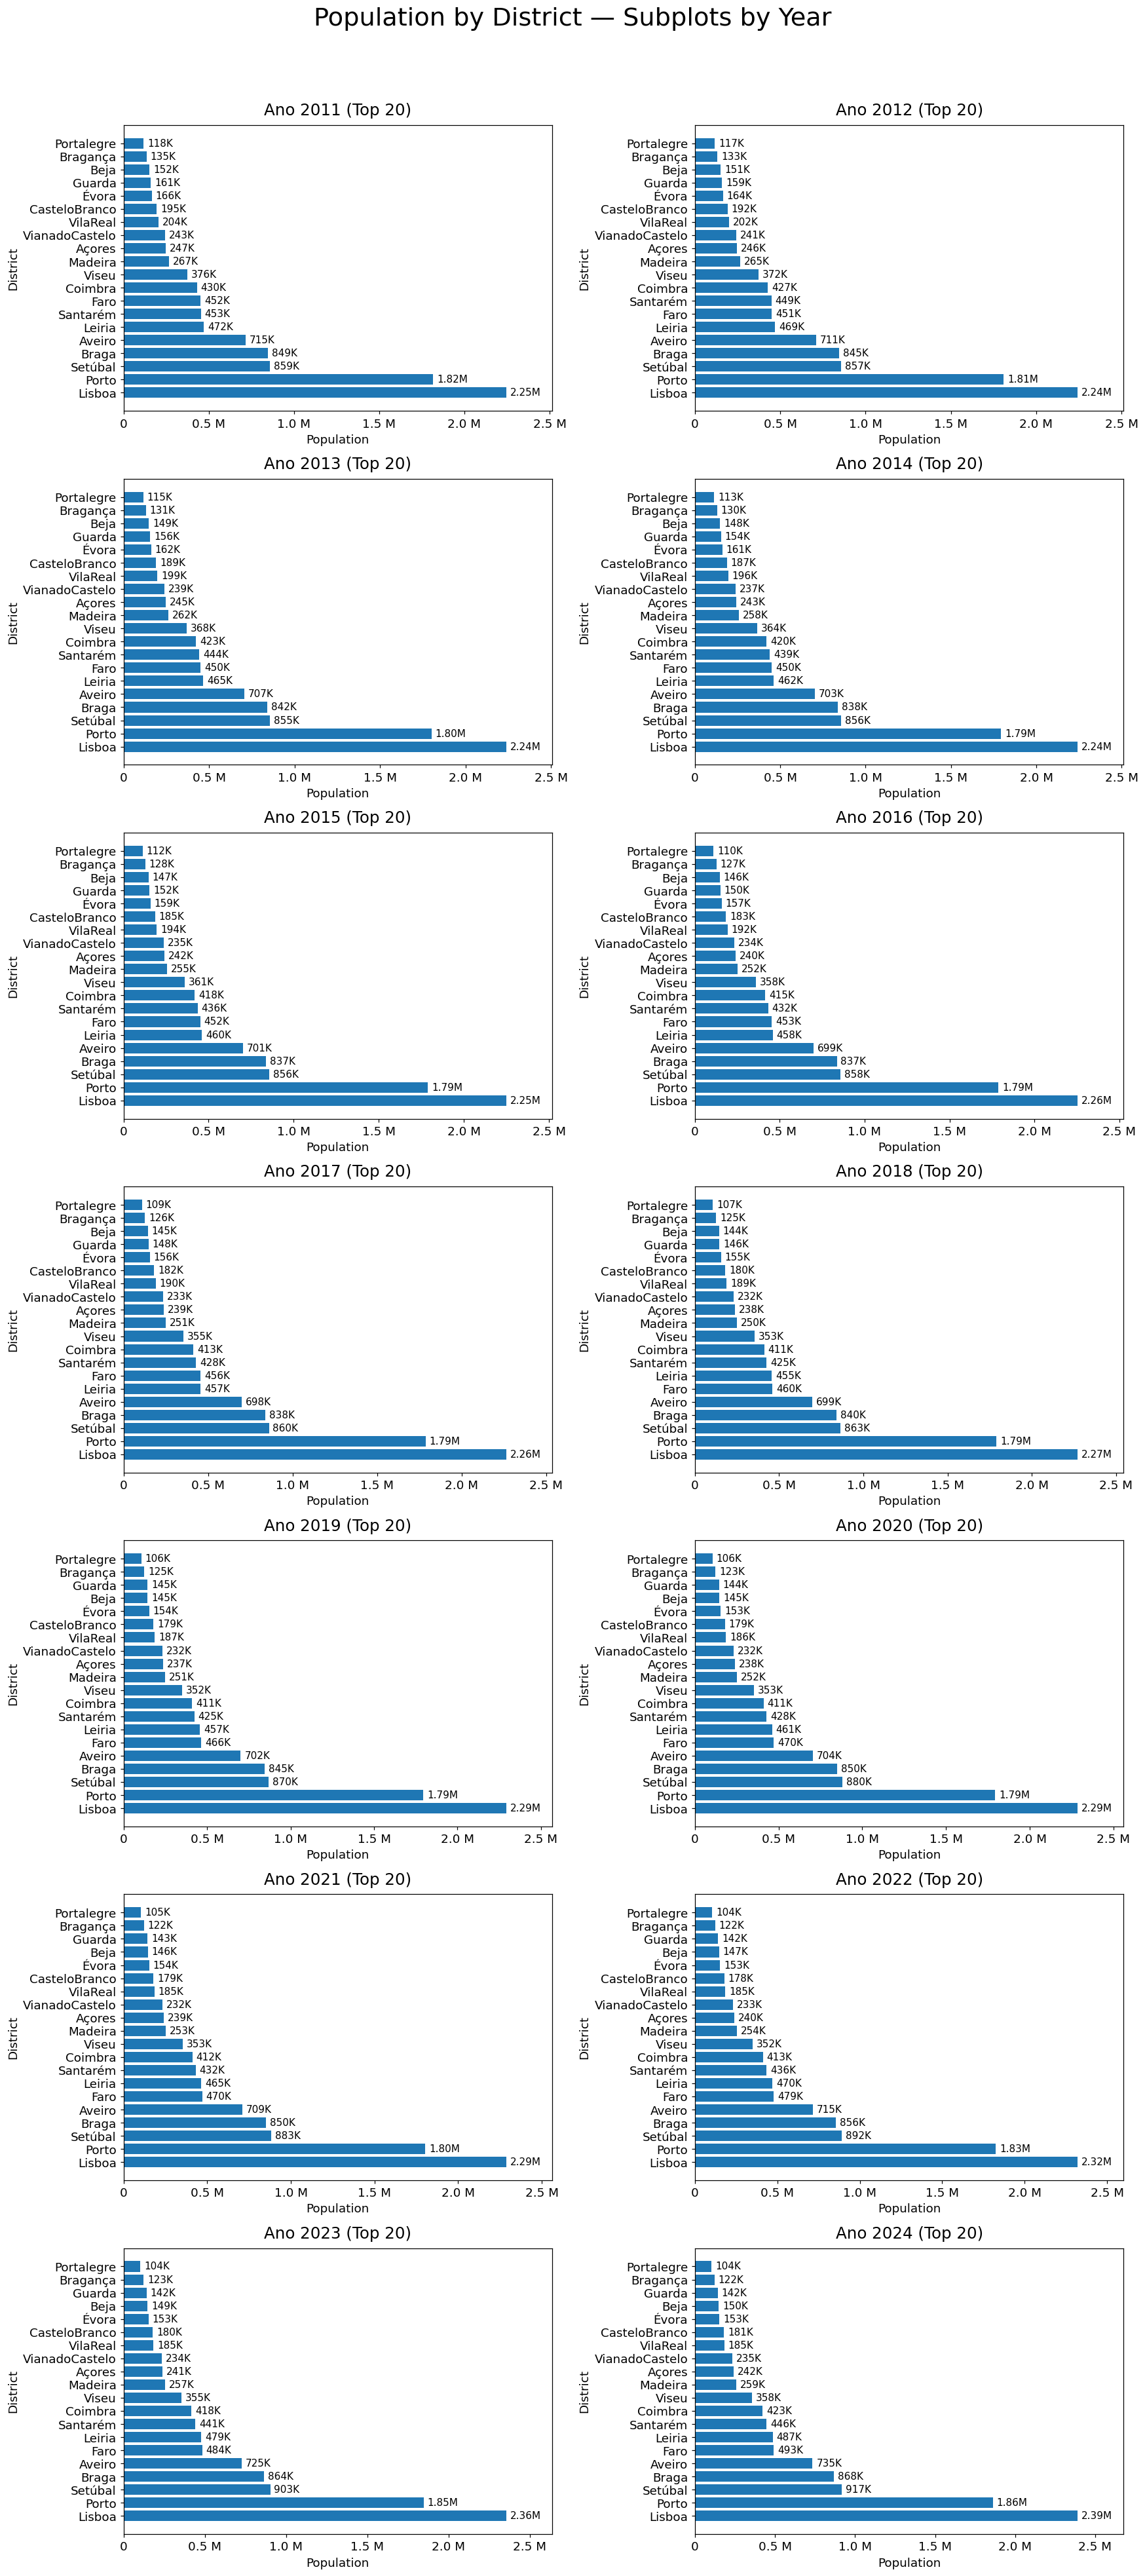

In [14]:
import math
import matplotlib.ticker as mtick 

df_year = (
    df_copy
    .groupby(['Ano', 'Distrito'], as_index=False)['Populacao']
    .sum()
)

years = sorted(df_year['Ano'].unique())
n = len(years)
ncols = 2
nrows = math.ceil(n / ncols) 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 5*nrows), dpi=110)
axes = axes.flatten()

# Format
def millions_formatter(x, pos):
    if x == 0:
        return '0'
    return f'{x/1_000_000:.1f} M'

TOP_N = 20
for i, year in enumerate(years):
    ax = axes[i]

    df_filter = (df_year[df_year['Ano'] == year]
         .sort_values('Populacao', ascending=False)
         .head(TOP_N)
         .sort_values('Populacao', ascending=True)
    )

    bars = ax.barh(df_filter['Distrito'], df_filter['Populacao'])
    ax.set_title(f'Ano {year} (Top {TOP_N})', fontsize=16, pad=10)
    ax.set_xlabel('Population', fontsize=12)
    ax.set_ylabel('District', fontsize=12)
    ax.tick_params(axis='both', labelsize=12)
    ax.invert_yaxis()

    maxv = df_filter['Populacao'].max() if len(df_filter) else 0
    offset = maxv * 0.01
    ax.set_xlim(0, maxv * 1.12)
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(millions_formatter))  
    
# formatação
    for bar in bars:
        v = bar.get_width()
        if v >= 1_000_000:
            label = f'{v/1_000_000:.2f}M'
        elif v >= 1_000:
            label = f'{v/1_000:.0f}K'
        else:
            label = f'{v:.0f}'

        ax.text(
            v + offset,
            bar.get_y() + bar.get_height()/2,
            label,
            va='center',
            fontsize=10
        )

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Population by District — Subplots by Year', fontsize=25, y=1.02)
plt.tight_layout()
plt.show()

# Final Answer: Pie chart highlighting population above 500,000 and by year.

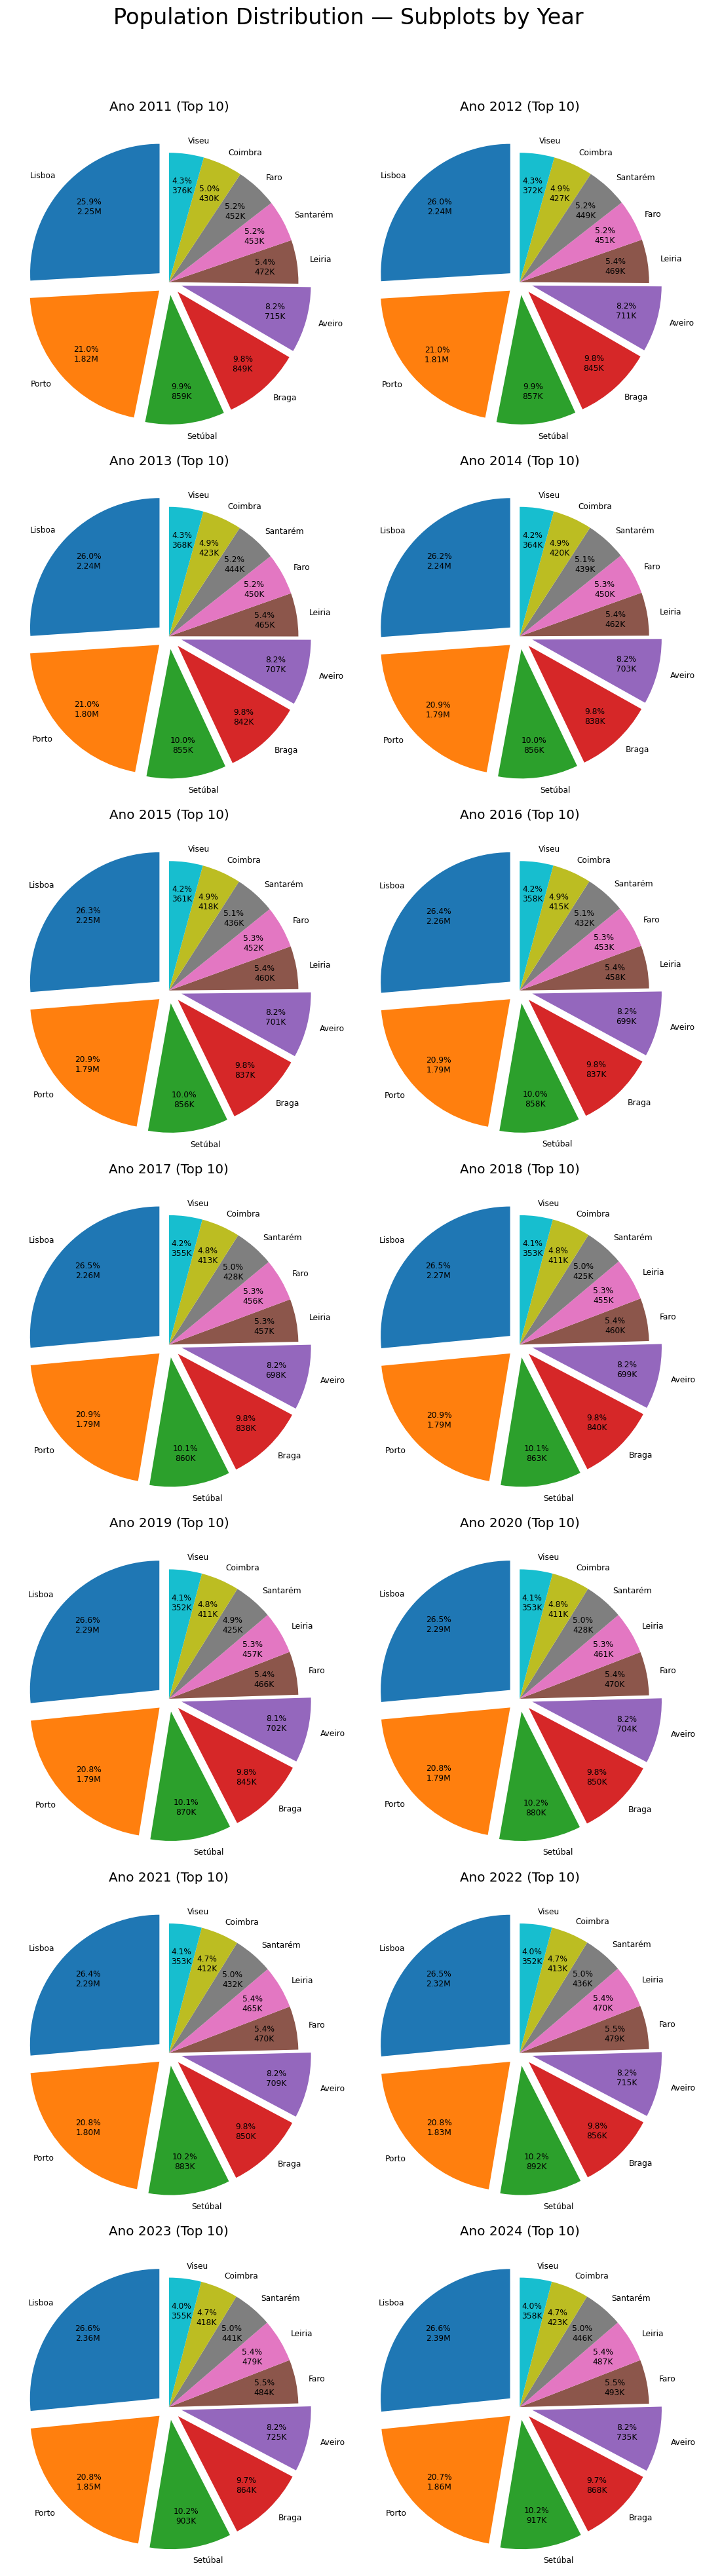

In [15]:
import math
import numpy as np
df_year = (
    df_copy
    .groupby(['Ano', 'Distrito'], as_index=False)['Populacao']
    .sum()
)

years = sorted(df_year['Ano'].unique())

n = len(years)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 5*nrows), dpi=110)
axes = axes.flatten()

TOP_N = 10

for i, year in enumerate(years):
    ax = axes[i]

    df = (df_year[df_year['Ano'] == year]
         .sort_values('Populacao', ascending=False)
         .head(TOP_N)
    )

    values = df['Populacao']
    labels = df['Distrito']

    # função para mostrar % + escala K/M
    def autopct_format(pct):
        total = values.sum()
        absolute = pct * total / 100
        if absolute >= 1_000_000:
            val = f'{absolute/1_000_000:.2f}M'
        elif absolute >= 1_000:
            val = f'{absolute/1_000:.0f}K'
        else:
            val = f'{absolute:.0f}'
        return f'{pct:.1f}%\n{val}'
    df['Explode'] = [0.1 if v > 500_000 else 0 for v in values]

    ax.pie(
        values,
        labels=labels,
        autopct=autopct_format,
        startangle=90,
        explode=df['Explode'],
        textprops={'fontsize': 8},
        pctdistance=0.75,
        labeldistance=1.1
    )

    ax.set_title(f'Ano {year} (Top {TOP_N})', fontsize=13, pad=10)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Population Distribution — Subplots by Year', fontsize=22, y=1.02)
plt.tight_layout()
plt.show()

# Analysis

There are 5 districts that remain above 500,000 inhabitants: Lisbon, Porto, Setúbal, Braga, and Aveiro. All the others have fewer than 500,000 inhabitants.

In [16]:
df_lisboa = df_copy[df_copy['Distrito'] == 'Lisboa'].sort_values('Ano', ascending=True)

df_porto = df_copy[df_copy['Distrito'] == 'Porto'].sort_values('Ano')

df_setubal = df_copy[df_copy['Distrito'] == 'Setúbal'].sort_values('Ano')

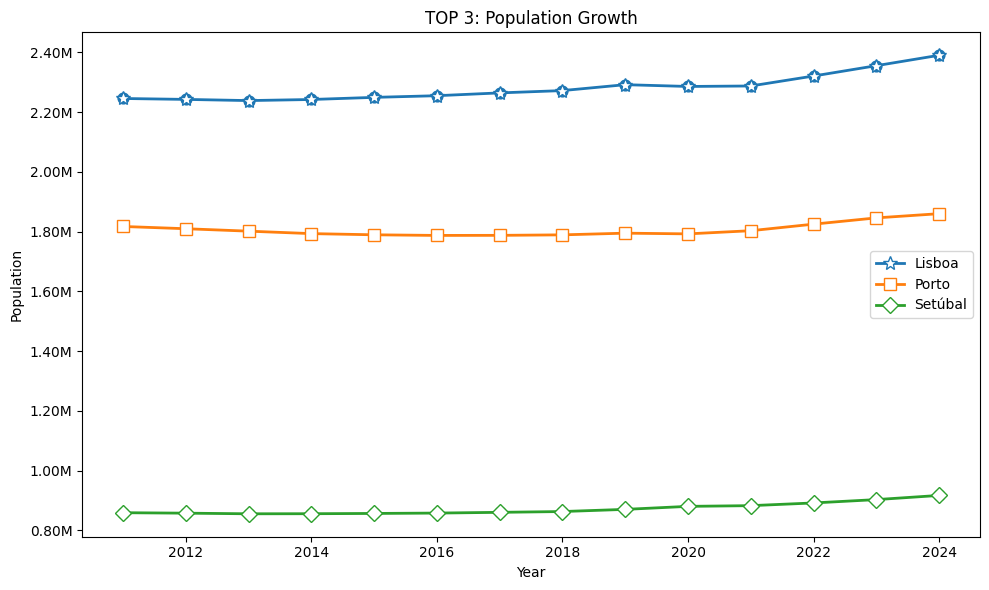

In [17]:
# TOP 3: POPULATION GROWTH # Porto: population growth
import matplotlib.ticker as mtick

plt.figure(figsize=(10,6))

# Lisbon: population growth
plt.plot(df_lisboa['Ano'], df_lisboa['Populacao'], linewidth=2,  label=df_lisboa['Distrito'].unique()[0],  marker='*', markersize=10 ,   markerfacecolor='white'  )
plt.scatter(df_lisboa['Ano'], df_lisboa['Populacao'], s=60)

# Porto:  population growth
plt.plot(df_porto['Ano'], df_porto['Populacao'], linewidth=2, label=df_porto['Distrito'].unique()[0],  marker='s', markersize=8 ,   markerfacecolor='white'  )
plt.scatter(df_porto['Ano'], df_porto['Populacao'], s=60)

# Setúbal:  population growth
plt.plot(df_setubal['Ano'], df_setubal['Populacao'], linewidth=2, label=df_setubal['Distrito'].iloc[0],  marker='D', markersize=8 ,   markerfacecolor='white'  )
plt.scatter(df_setubal['Ano'], df_setubal['Populacao'], s=60)


plt.title('TOP 3: Population Growth')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()

def millions(x, pos):
    return f'{x/1_000_000:.2f}M'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(millions))

plt.tight_layout()

plt.show()

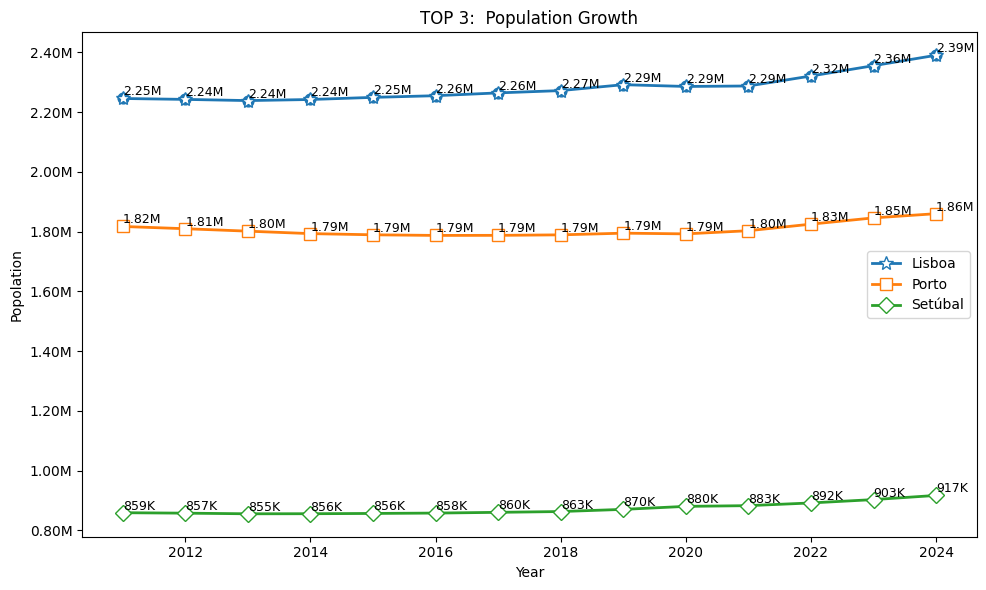

In [18]:
import matplotlib.ticker as mtick

plt.figure(figsize=(10,6))

# Lisboa:  Population Growth
plt.plot(df_lisboa['Ano'], df_lisboa['Populacao'], linewidth=2,  label=df_lisboa['Distrito'].unique()[0],  marker='*', markersize=10 ,   markerfacecolor='white'  )
plt.scatter(df_lisboa['Ano'], df_lisboa['Populacao'], s=60)
for x, y in zip(df_lisboa['Ano'], df_lisboa['Populacao']):
    
    if y >= 1_000_000:
        label = f'{y/1_000_000:.2f}M'
    else:
        label = f'{y/1_000:.0f}K'
    
    plt.text(
        x,
        y,
        label,
        fontsize=9,
        ha='left',
        va='bottom'
    )

#Porto:  Population Growth
plt.plot(df_porto['Ano'], df_porto['Populacao'], linewidth=2, label=df_porto['Distrito'].unique()[0],  marker='s', markersize=8 ,   markerfacecolor='white'  )
plt.scatter(df_porto['Ano'], df_porto['Populacao'], s=60)
for x, y in zip(df_porto['Ano'], df_porto['Populacao']):
    
    if y >= 1_000_000:
        label = f'{y/1_000_000:.2f}M'
    else:
        label = f'{y/1_000:.0f}K'
    
    plt.text(
        x,
        y,
        label,
        fontsize=9,
        ha='left',
        va='bottom'
    )
    
# Setúbal:  Population Growth
plt.plot(df_setubal['Ano'], df_setubal['Populacao'], linewidth=2, label=df_setubal['Distrito'].iloc[0],  marker='D', markersize=8 ,   markerfacecolor='white'  )
plt.scatter(df_setubal['Ano'], df_setubal['Populacao'], s=60)
for x, y in zip(df_setubal['Ano'], df_setubal['Populacao']):
    
    if y >= 1_000_000:
        label = f'{y/1_000_000:.2f}M'
    else:
        label = f'{y/1_000:.0f}K'
    
    plt.text(
        x,
        y,
        label,
        fontsize=9,
        ha='left',
        va='bottom'
    )


plt.title('TOP 3:  Population Growth')
plt.xlabel('Year')
plt.ylabel('Popolation')
plt.legend()

def millions(x, pos):
    return f'{x/1_000_000:.2f}M'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(millions))

plt.tight_layout()

plt.show()

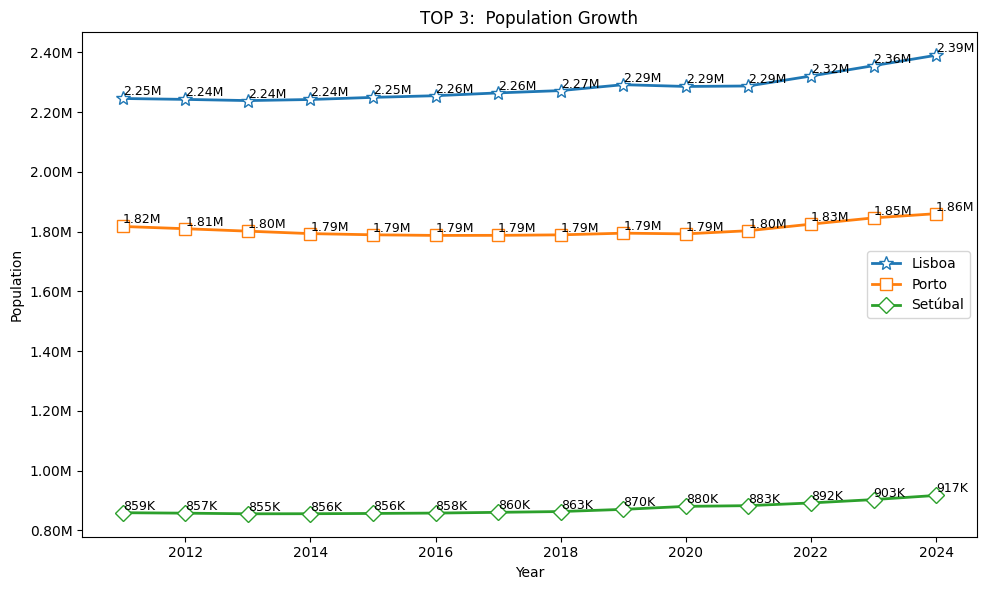

In [19]:
# refactoring
series = [
    (df_lisboa,  '*', 10),
    (df_porto,   's', 8),
    (df_setubal, 'D', 8),
]

def fmt_k_or_m(y):
    return f'{y/1_000_000:.2f}M' if y >= 1_000_000 else f'{y/1_000:.0f}K'

plt.figure(figsize=(10, 6))

for df_d, marker, msize in series:
    label_name = df_d['Distrito'].iloc[0]

    plt.plot(
        df_d['Ano'],
        df_d['Populacao'],
        linewidth=2,
        label=label_name,
        marker=marker,
        markersize=msize,
        markerfacecolor='white'
    )

    for x, y in zip(df_d['Ano'], df_d['Populacao']):
        plt.text(
            x,
            y,
            fmt_k_or_m(y),
            fontsize=9,
            ha='left',
            va='bottom'
        )

plt.title('TOP 3:  Population Growth')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()

def millions(x, pos):
    return f'{x/1_000_000:.2f}M'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(millions))

plt.tight_layout()
plt.show()

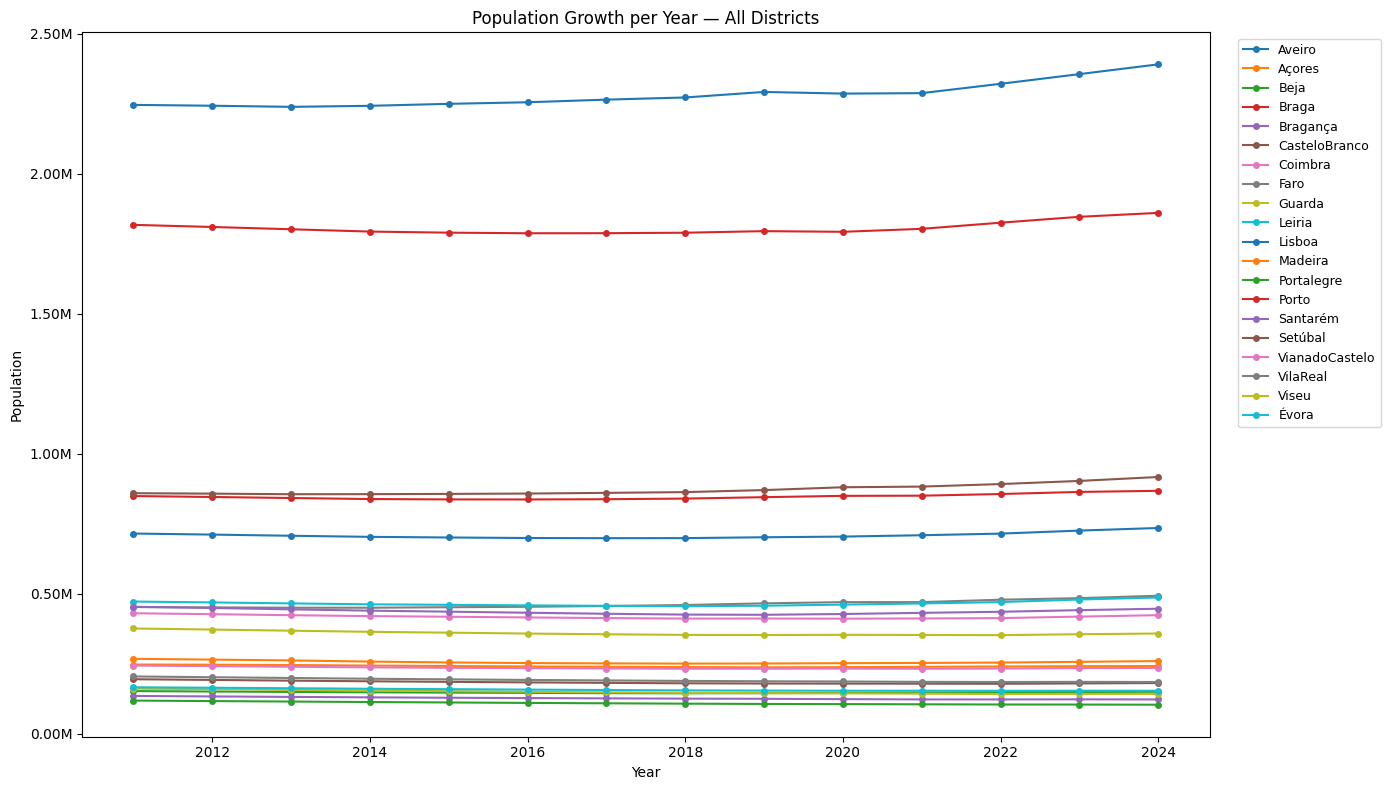

In [20]:
# 1) Ensure granularity Year + District (adjust sum -> max/last if Population is snapshot)
df_year = (
    df_copy
    .groupby(['Ano', 'Distrito'], as_index=False)['Populacao']
    .sum()
)

def fmt_km(y):
    return f'{y/1_000_000:.2f}M' if y >= 1_000_000 else f'{y/1_000:.0f}K'

plt.figure(figsize=(14, 8))

for distrito in sorted(df_year['Distrito'].unique()):
    d = df_year[df_year['Distrito'] == distrito].sort_values('Ano')

    plt.plot(
        d['Ano'],
        d['Populacao'],
        linewidth=1.5,
        marker='o',
        markersize=4,
        label=distrito
    )

plt.title('Population Growth per Year — All Districts')
plt.xlabel('Year')
plt.ylabel('Population')

def millions(x, pos):
    return f'{x/1_000_000:.2f}M'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(millions))

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

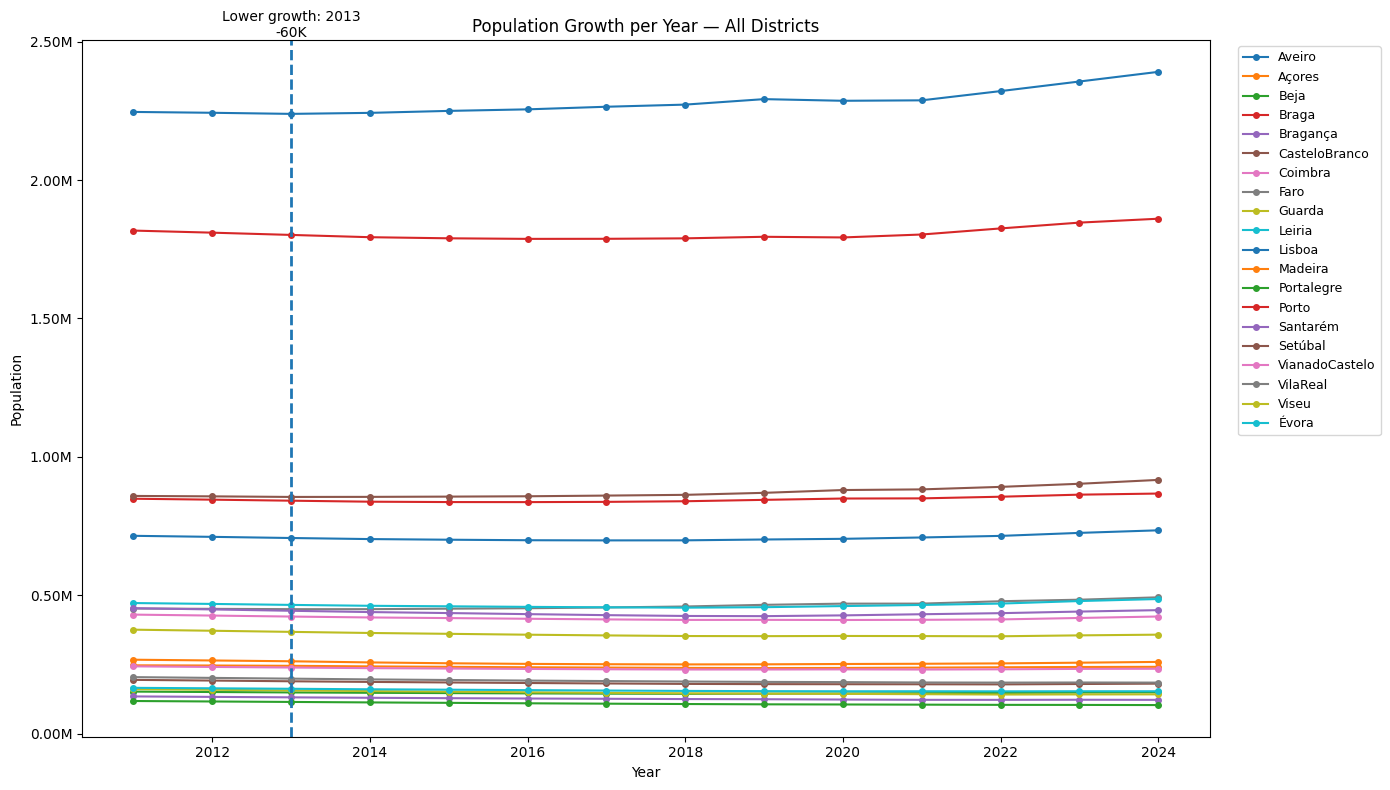

In [21]:
#1) Ensure granularity Year + District
df_year = (
    df_copy
    .groupby(['Ano', 'Distrito'], as_index=False)['Populacao']
    .sum()
)

plt.figure(figsize=(14, 8))

# Plot de todos os distritos
for distrito in sorted(df_year['Distrito'].unique()):
    d = df_year[df_year['Distrito'] == distrito].sort_values('Ano')

    plt.plot(
        d['Ano'],
        d['Populacao'],
        linewidth=1.5,
        marker='o',
        markersize=4,
        label=distrito
    )

# (YoY)
tot = (
    df_year
    .groupby('Ano', as_index=False)['Populacao']
    .sum()
    .sort_values('Ano')
)

tot['growth'] = tot['Populacao'].diff()

min_row = tot.loc[tot['growth'].idxmin()]
min_year = int(min_row['Ano'])
min_growth = float(min_row['growth'])


ax = plt.gca()
ax.axvline(min_year, linestyle='--', linewidth=2)

ymax = ax.get_ylim()[1]
ax.text(
    min_year,
    ymax,
    f'Lower growth: {min_year}\n{min_growth/1_000:.0f}K',
    ha='center',
    va='bottom',
    fontsize=10
)

plt.title('Population Growth per Year — All Districts')
plt.xlabel('Year')
plt.ylabel('Population')


def millions(x, pos):
    return f'{x/1_000_000:.2f}M'

ax.yaxis.set_major_formatter(mtick.FuncFormatter(millions))

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)

plt.tight_layout()
plt.show()


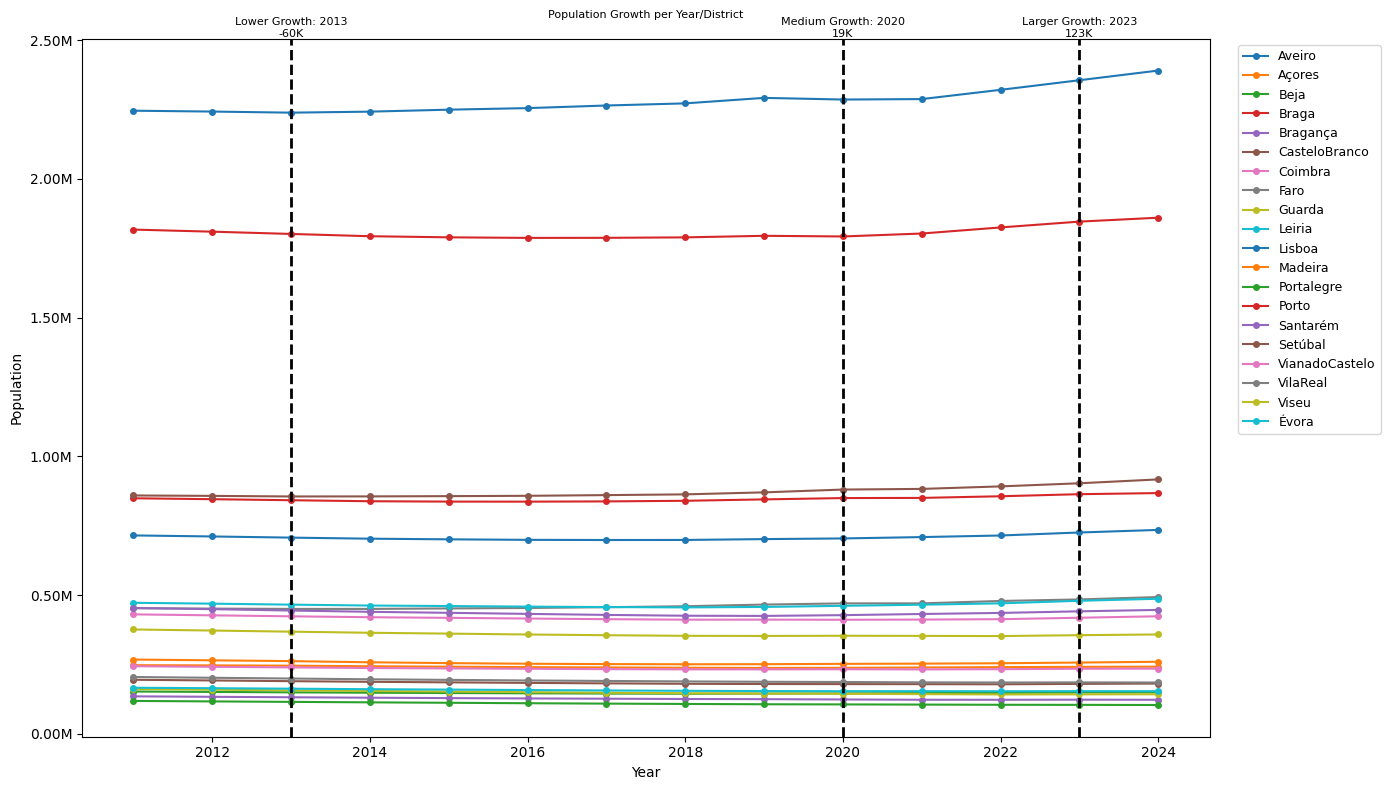

In [22]:
df_year = (
    df_copy
    .groupby(['Ano', 'Distrito'], as_index=False)['Populacao']
    .sum()
)

plt.figure(figsize=(14, 8))

for distrito in sorted(df_year['Distrito'].unique()):
    d = df_year[df_year['Distrito'] == distrito].sort_values('Ano')

    plt.plot(
        d['Ano'],
        d['Populacao'],
        linewidth=1.5,
        marker='o',
        markersize=4,
        label=distrito
    )


tot = (
    df_year
    .groupby('Ano', as_index=False)['Populacao']
    .sum()
    .sort_values('Ano')
)

tot['growth'] = tot['Populacao'].diff()

g = tot['growth'].dropna()

# smaller and larger growth
min_row = tot.loc[tot['growth'].idxmin()]
max_row = tot.loc[tot['growth'].idxmax()]

min_year = int(min_row['Ano'])
min_growth = float(min_row['growth'])

max_year = int(max_row['Ano'])
max_growth = float(max_row['growth'])

# "average growth": year in which growth is closest to the average growth
mean_growth = float(g.mean())
mid_idx = (g - mean_growth).abs().idxmin()
mid_row = tot.loc[mid_idx]

mid_year = int(mid_row['Ano'])
mid_growth = float(mid_row['growth'])

ax = plt.gca()

ax.axvline(min_year, linestyle='--', linewidth=2, color='black')
ax.axvline(mid_year, linestyle='--', linewidth=2, color='black')
ax.axvline(max_year, linestyle='--', linewidth=2, color='black')


ymax = ax.get_ylim()[1]
ax.text(min_year, ymax, f'Lower Growth: {min_year}\n{min_growth/1_000:.0f}K',
        ha='center', va='bottom', fontsize=8, color='black')
ax.text(mid_year, ymax, f'Medium Growth: {mid_year}\n{mid_growth/1_000:.0f}K',
        ha='center', va='bottom', fontsize=8, color='black')
ax.text(max_year, ymax, f'Larger Growth: {max_year}\n{max_growth/1_000:.0f}K',
        ha='center', va='bottom', fontsize=8, color='black')


plt.title('Population Growth per Year/District', fontsize=8, pad=15)
plt.xlabel('Year')
plt.ylabel('Population')

def millions(x, pos):
    return f'{x/1_000_000:.2f}M'

ax.yaxis.set_major_formatter(mtick.FuncFormatter(millions))

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)

plt.tight_layout()
plt.show()


# Analysis of Results
In 2013, there was the lowest population growth. Between 2013 and 2020, the population remained stable.

From 2020 onwards, there was a slight increase, followed by a peak in population growth in 2023, when there was again a population decline in 2024.